In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

## 1) Read the dataset

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Project/Mercedes-Greener-Manufact/Datasets/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Project/Mercedes-Greener-Manufact/Datasets/test.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [7]:
df.head(n = 5)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


## 2) What is the distribution of the testing time (y) in this dataset?

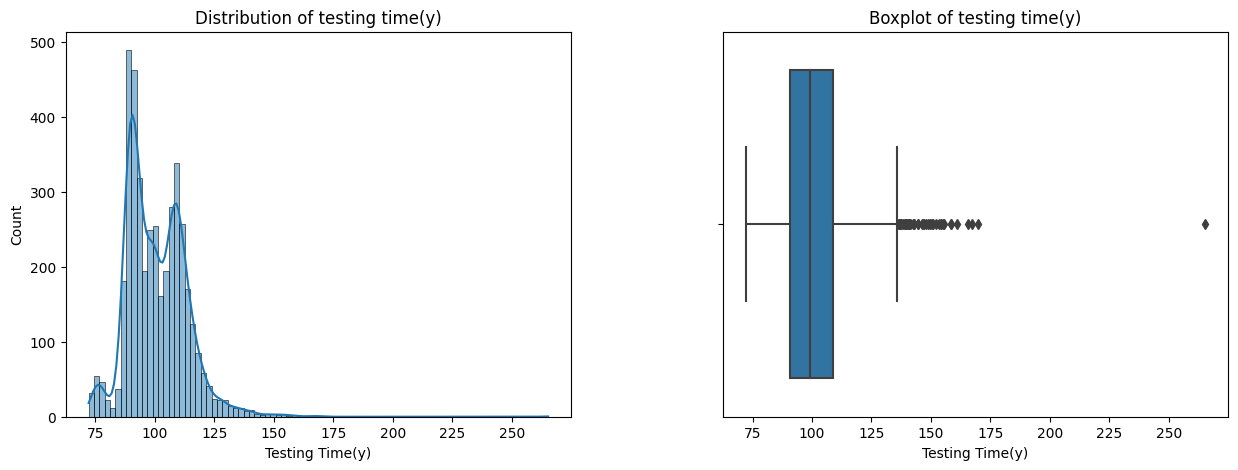

In [8]:
# create subplots with 1 row and 2 columns
fig, axs = plt.subplots(ncols=2, figsize=(15,5))

# plot distplot on the first subplot
sns.histplot(data=df, x='y', kde=True, ax=axs[0])
axs[0].set_title('Distribution of testing time(y)')
# set the x-axis label
axs[0].set_xlabel("Testing Time(y)")

# plot boxplot on the second subplot
sns.boxplot(data=df, x='y', ax=axs[1])
axs[1].set_title('Boxplot of testing time(y)')
axs[1].set_xlabel("Testing Time(y)")

# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# show the plots
plt.show()

Observations
* There are 2 distinct peaks in the testing time between 75 and 100 and between 125 and 150.
* There are outliers points in the testing time.

## 3) Getter function for 4) to 12) onwards

In [9]:
import matplotlib.ticker as mtick
def plot_hist_and_box(x_variable, df):

  # create subplots with 1 row and 2 columns
  fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

  # plot distplot on the first subplot
  ax1 = sns.histplot(data=df, x=x_variable, kde=True, ax=axs[0])
  axs[0].set_title('Distribution of {}'.format(x_variable))
  axs[0].set_xlabel("{} Variables".format(x_variable))

  # iterate over the patches and add count labels
  for patch in ax1.patches:
      height = patch.get_height()
      ax1.text(patch.get_x() + patch.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

  # plot boxplot on the second subplot
  ax2 = sns.boxplot(x=df[x_variable], y=df['y'], ax=axs[1])
  axs[1].set_title('Boxplot of {} column'.format(x_variable))
  axs[1].set_xlabel("{} Variables".format(x_variable))
  axs[1].set_ylabel("Testing Time(y)")

  # show the plots
  plt.show()

## 3) What is the count distribution for X0 and the testing times corresponding to each category in X_0?

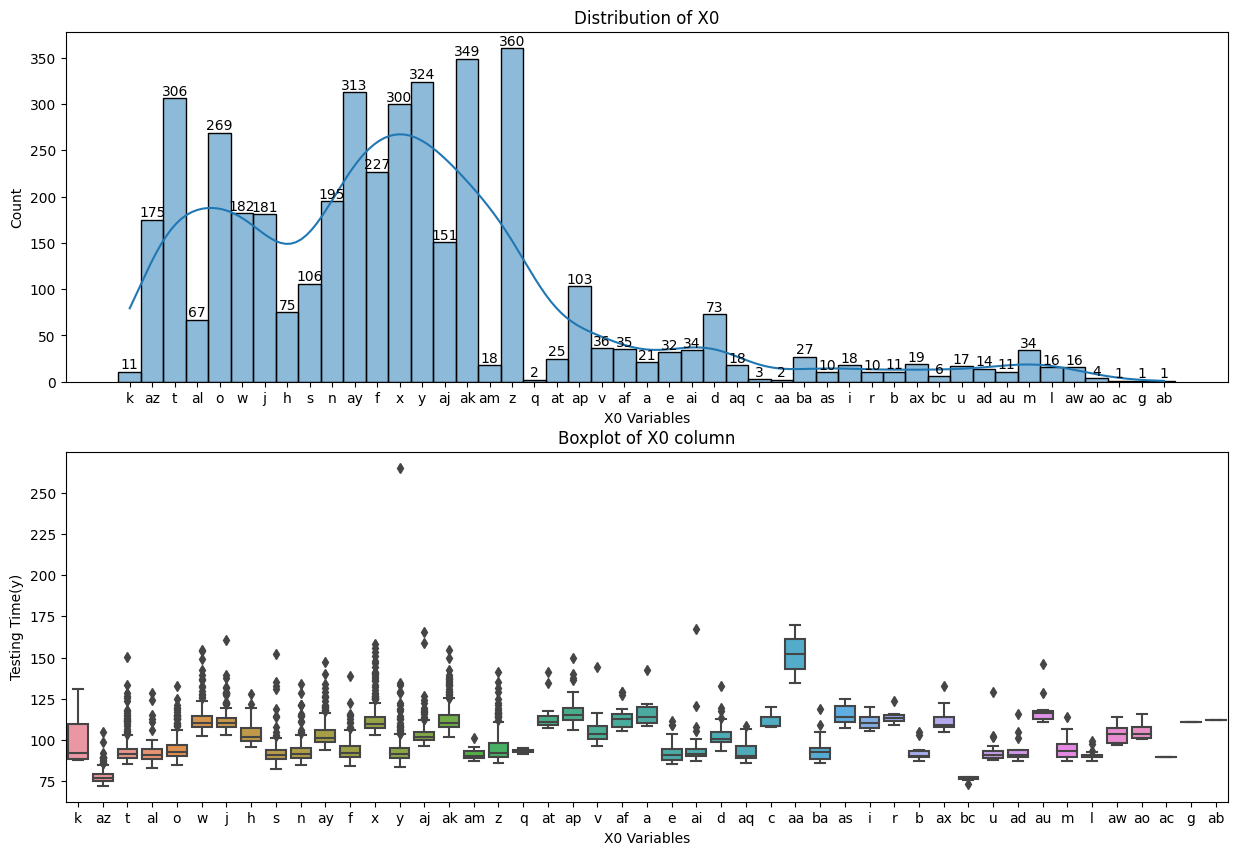

In [10]:
plot_hist_and_box('X0', df)

Observations
* We could see that the categories in the X0 column are not evenly distributed.
* ao, ac, g and ab have 1 entry, which are concerning.
* There is an extreme outlier from the y category for the boxplot.

## 4) What is the count distribution for X1 and the testing times corresponding to each category in X1?

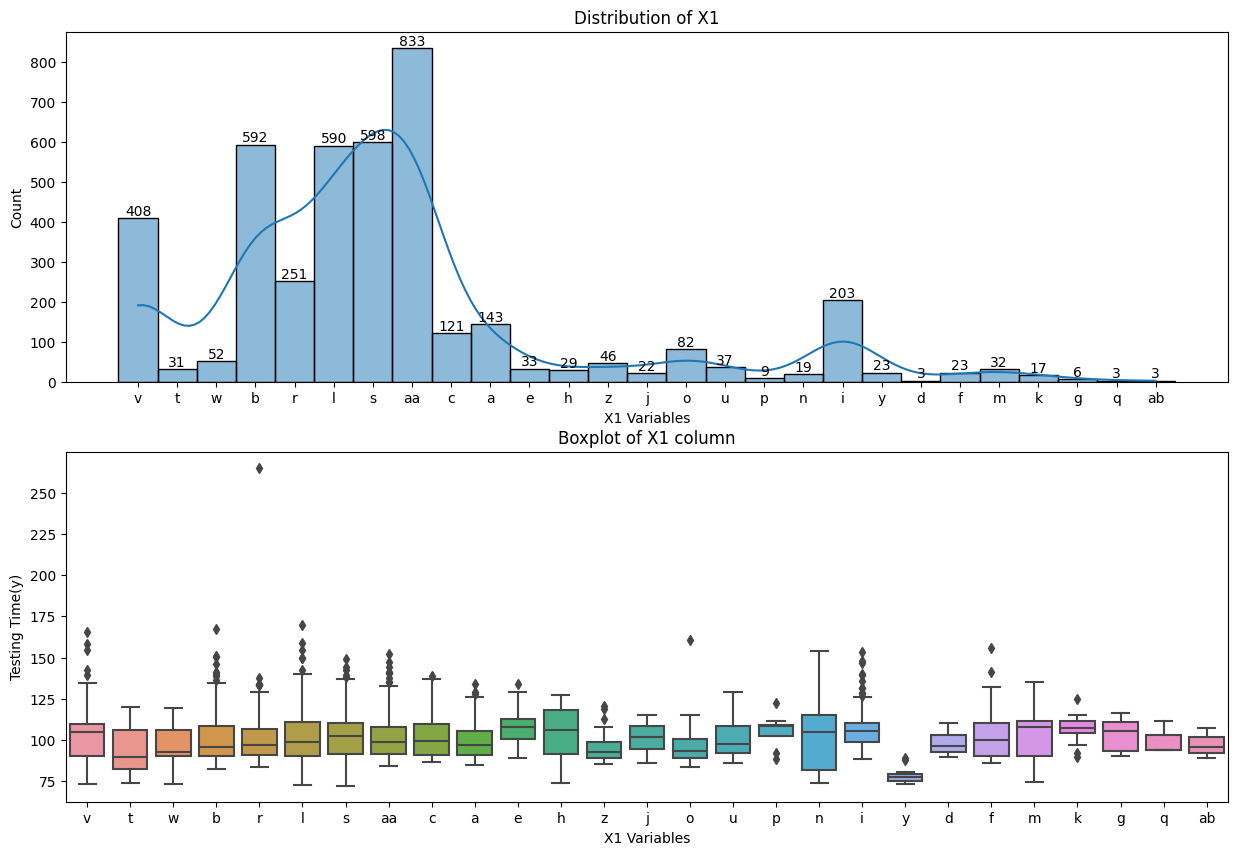

In [11]:
plot_hist_and_box('X1', df)

Observations
* v, b, l, s and aa are popular category in the X1 column.
* There is a outlier in the r category for the X1 column with respect to the testing time.

## 5) What is the count distribution for X2 and the testing times corresponding to each category in X2?

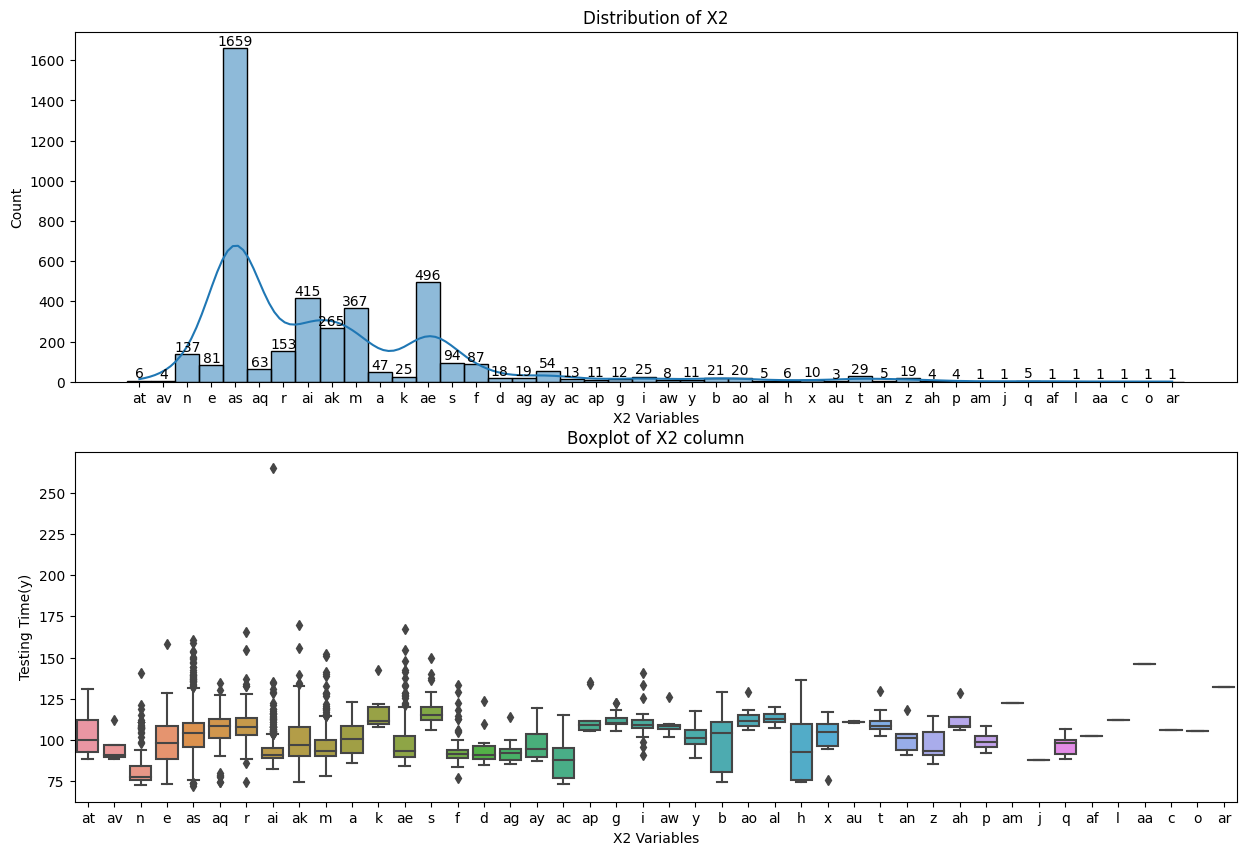

In [12]:
plot_hist_and_box('X2', df)

Observations
* as is the most popular category in the X2 column.
* am, j, af, l, aa, c, o and ar have only 1 entry for the X2 column, which necessitates embedding to become others.
* There is 1 extreme outlier in the r category for X2 column with respect to testing time.

## 6) What is the count distribution for X3 and the testing times corresponding to each category in X3?

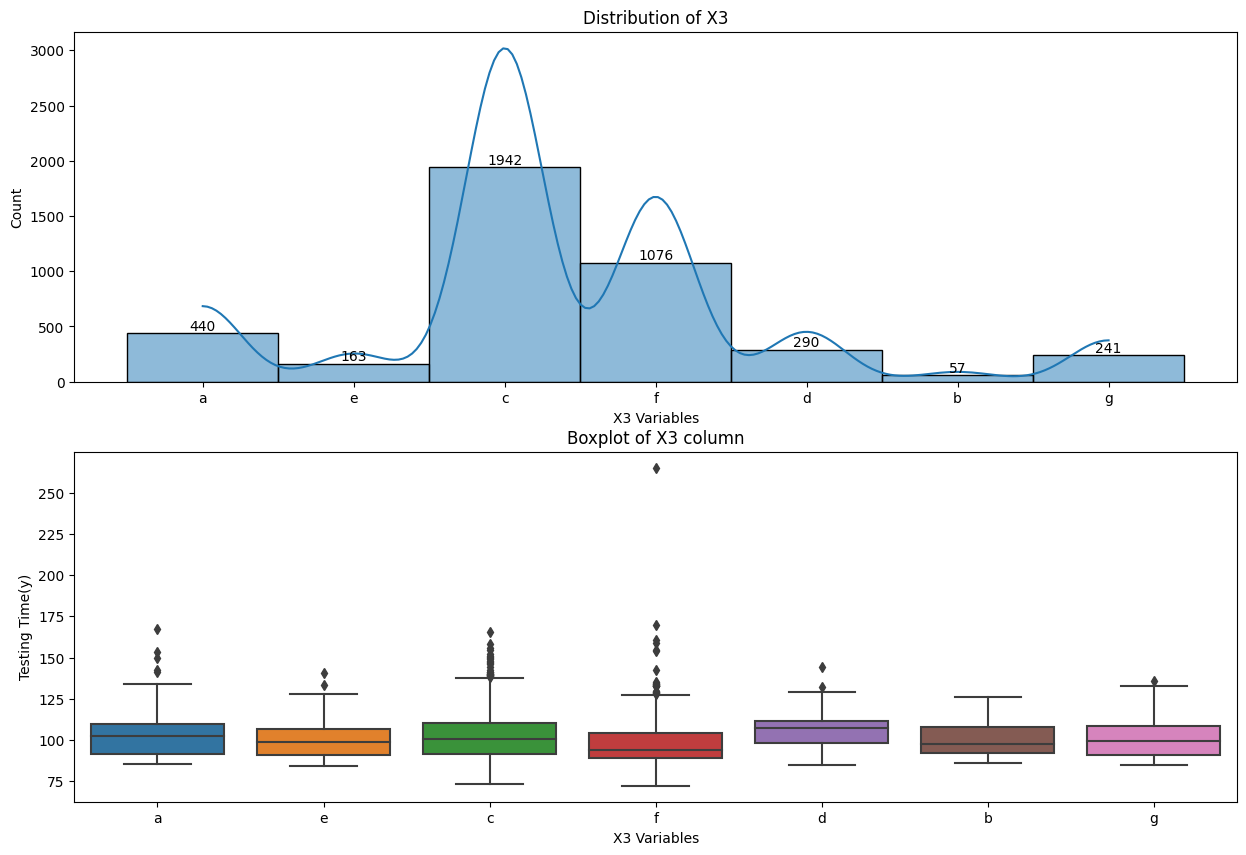

In [13]:
plot_hist_and_box('X3', df)

Observations
* There are sufficient points for each category to train in the X3 column.
* There is extreme outlier from the f category in the X3 column.

## 7) What is the count distribution for X4 and the testing times corresponding to each category in X4?

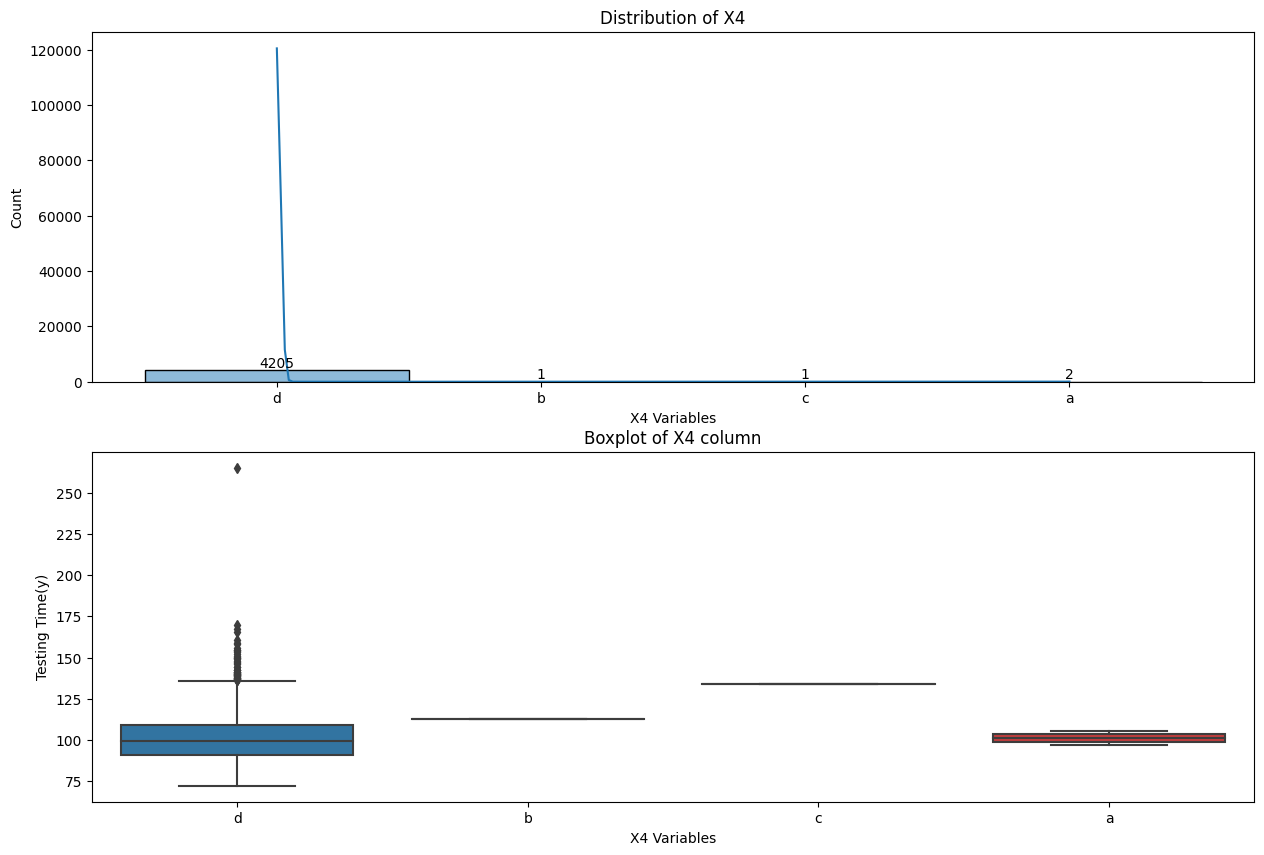

In [14]:
plot_hist_and_box('X4', df)

Observations
* a, b and c categories in the X4 column only has 1/2 entries, this is quite concerning. We will need to emb
* There is 1 extreme outlier in the d category of the X4 variables.
* We will need to embedd b, c and d categories together and label it as others.

## 8) What is the count distribution for X5 and the testing times corresponding to each category in X5?

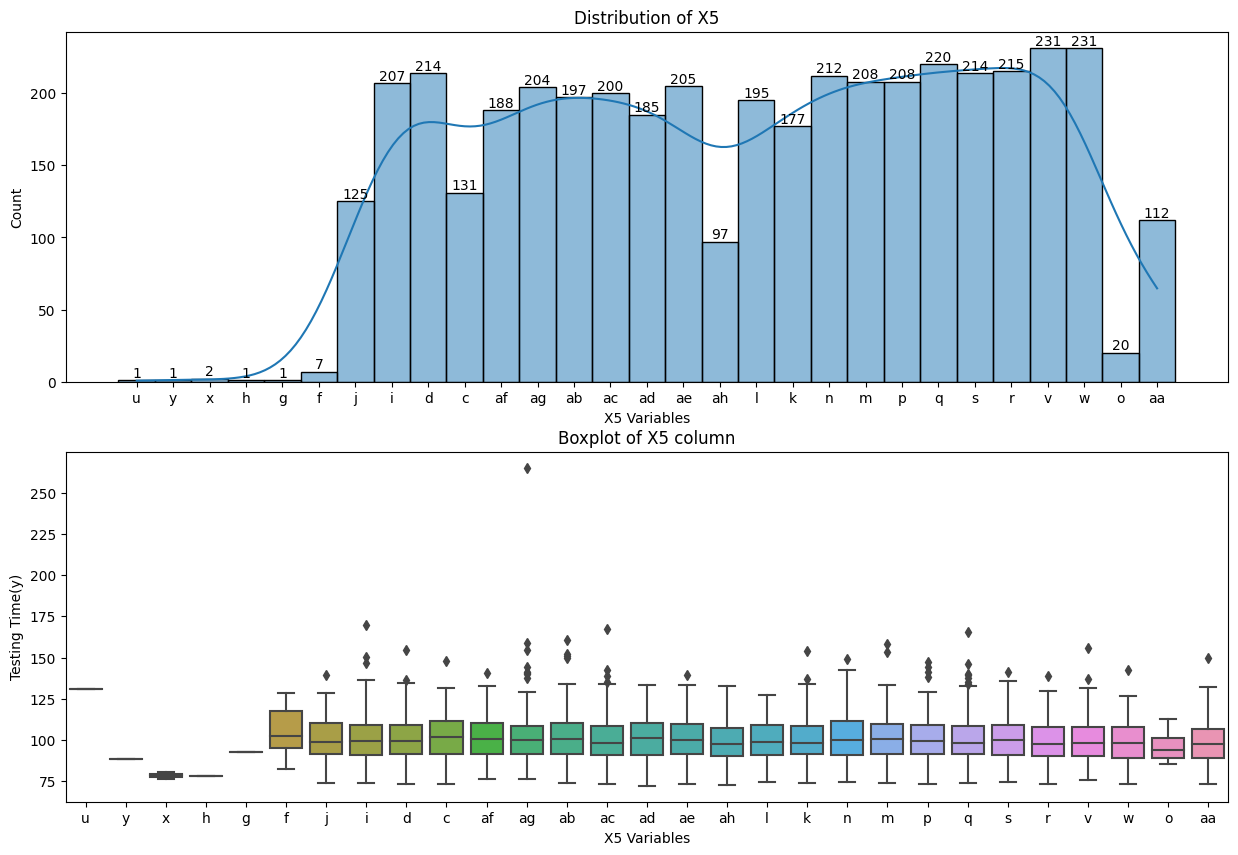

In [15]:
plot_hist_and_box('X5', df)

Observtations
* u, y, x, h, g have only 1 or 2 instances. We will need to embedd them together to form others.
* There is an extreme outlier from the ag category for the X5 variables.

## 9) What is the count distribution for X6 and the testing times corresponding to each category in X6?

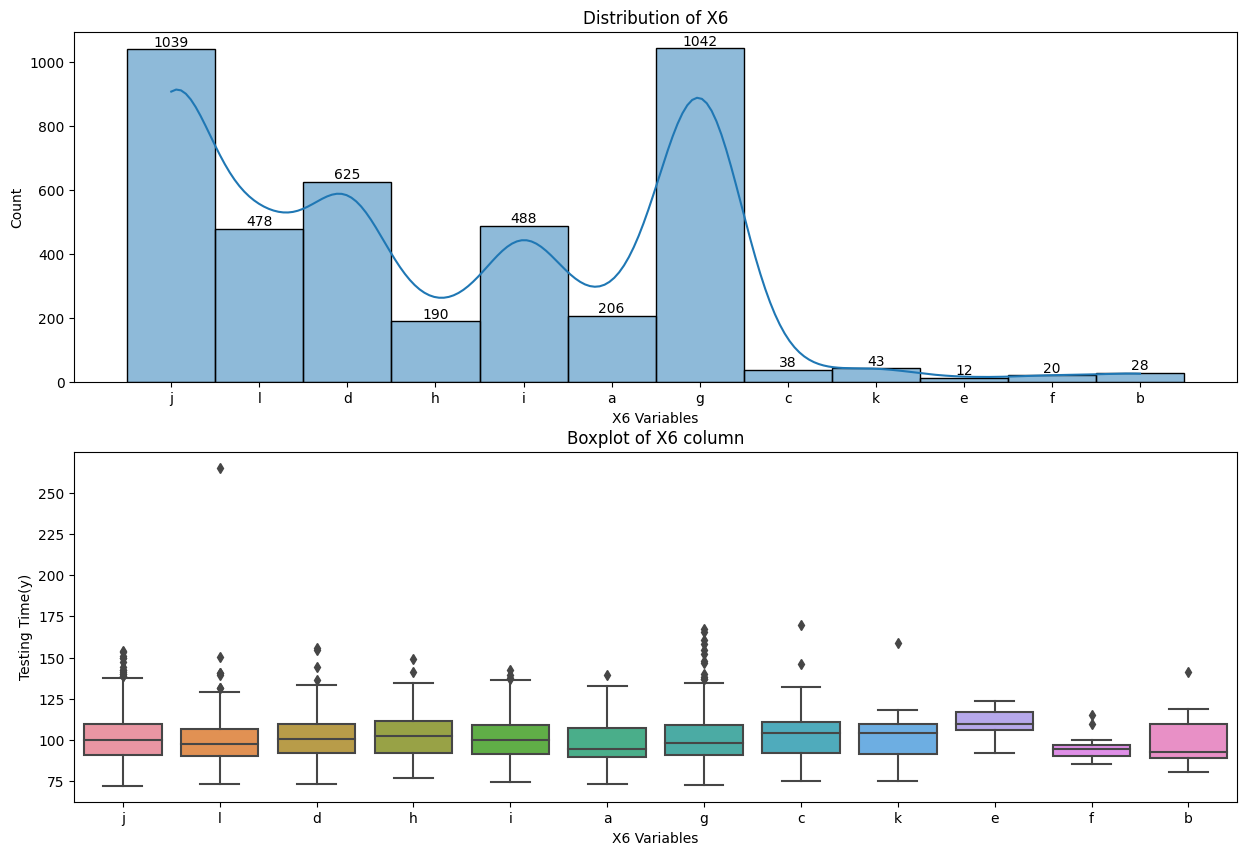

In [16]:
plot_hist_and_box('X6', df)

Observations
* There are sufficient instances in each category for the X6 to train the regression models.
* There is extreme outlier in l category from the X6 column.
* One hot encoding for this column should suffice.

## 10) What is the count distribution for X8 and the testing times corresponding to each category in X8?

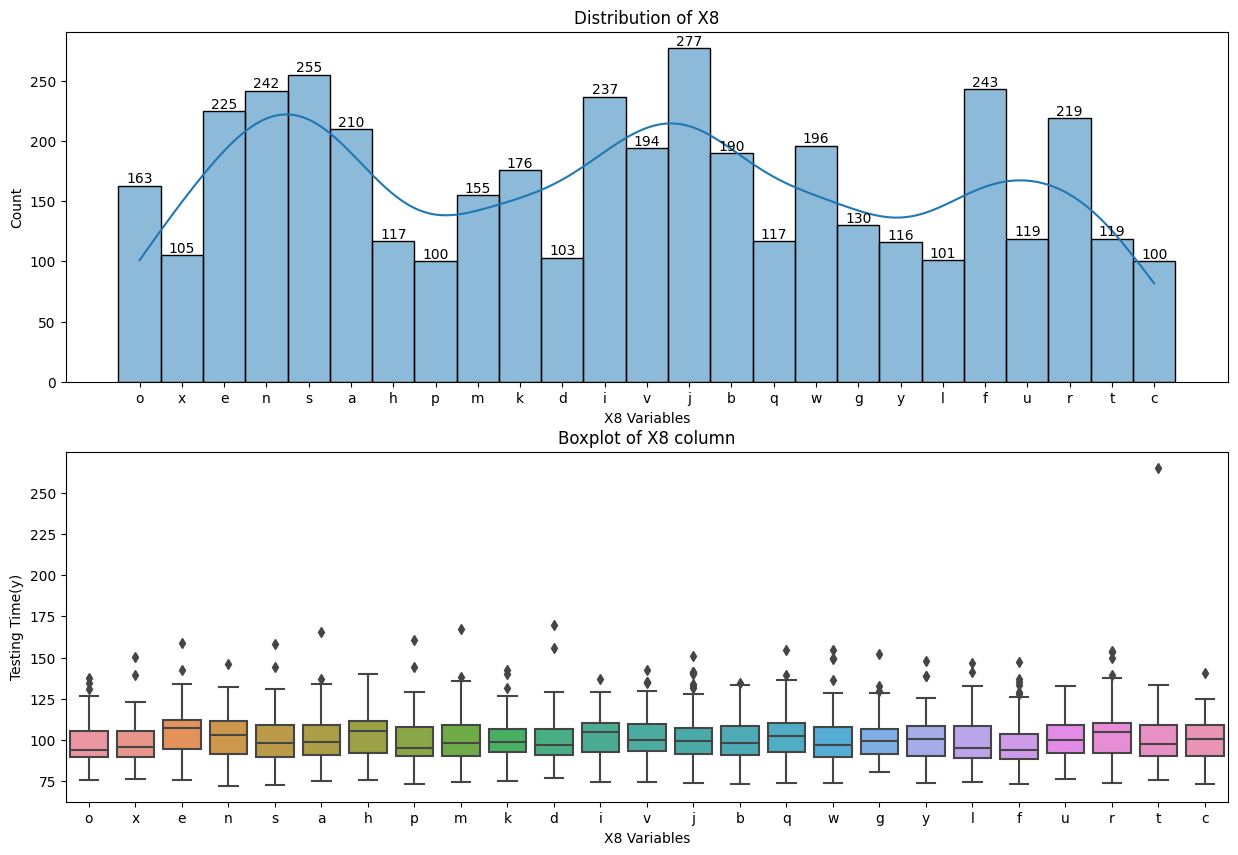

In [17]:
plot_hist_and_box('X8', df)

Observations
* There are sufficient points to learn from each category in the X8 variables.
* There is an extreme outlier from category t in the X8 column.
* One hot-encoding of the X8 columns should suffice.

## 11) What is the distribution for the binary variables from X9 to X385 columns

In [18]:
num_cols = [i for i in df.columns if i not in ["ID", "y", "X0", "X1", "X2", "X3","X4", "X5", "X6", "X8"]]

In [19]:
num_cols

['X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X65',
 'X66',
 'X67',
 'X68',
 'X69',
 'X70',
 'X71',
 'X73',
 'X74',
 'X75',
 'X76',
 'X77',
 'X78',
 'X79',
 'X80',
 'X81',
 'X82',
 'X83',
 'X84',
 'X85',
 'X86',
 'X87',
 'X88',
 'X89',
 'X90',
 'X91',
 'X92',
 'X93',
 'X94',
 'X95',
 'X96',
 'X97',
 'X98',
 'X99',
 'X100',
 'X101',
 'X102',
 'X103',
 'X104',
 'X105',
 'X106',
 'X107',
 'X108',
 'X109',
 'X110',
 'X111',
 'X112',
 'X113',
 'X114',
 'X115',
 'X116',
 'X117',
 'X118',
 'X119',
 'X120',
 'X122',
 'X123',
 'X124',
 'X125',
 'X126',
 'X127',
 'X128',
 'X129',
 'X130',
 'X131',
 'X132',
 'X133',

In [20]:
#Percentage of zeros in numerical features
zero_counts_per = [round(100*df[i].value_counts()[0]/df.shape[0],2) for i in num_cols]

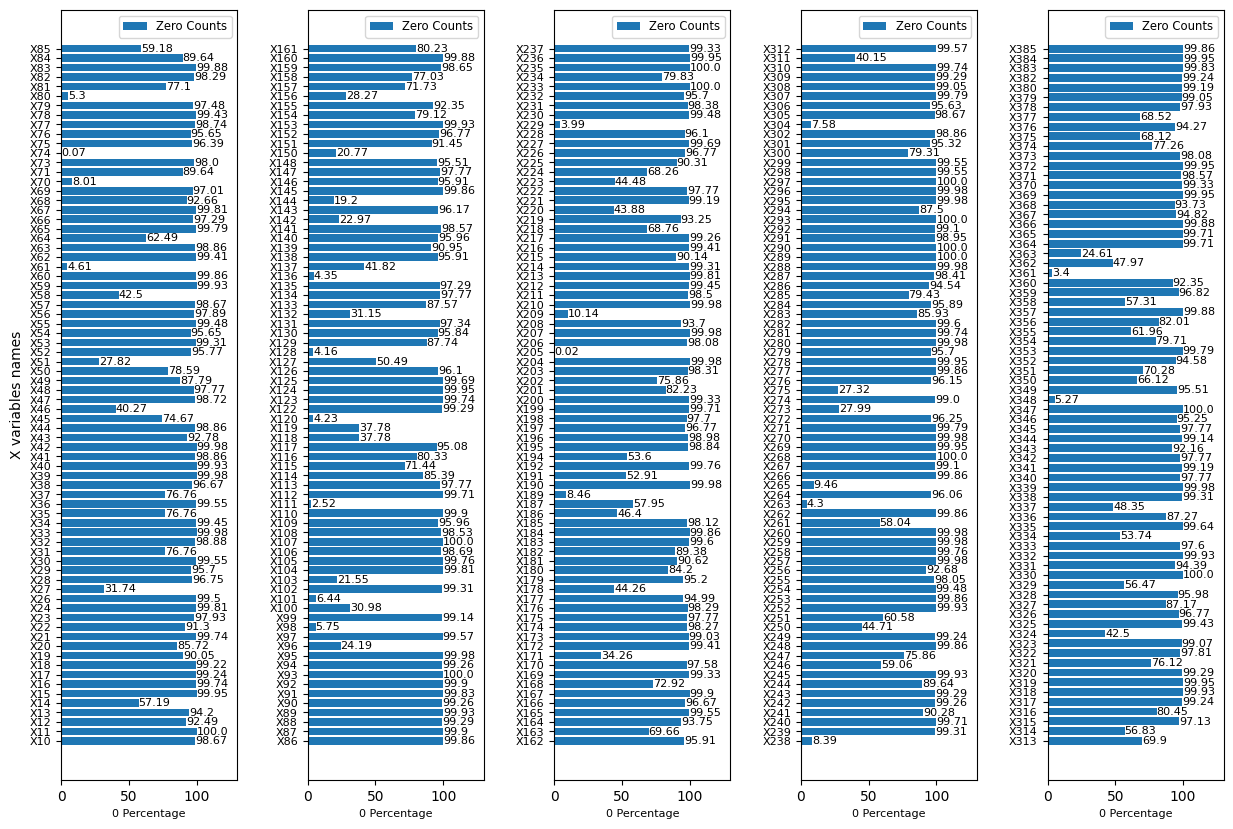

In [21]:
# create subplots with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 10))
ind = np.arange(len(zero_counts_per))
for i in range(0, 5):
  if i != 4:
    # plot distplot on the first subplot
    axs[i].barh(num_cols[i*74:(i+1)*74],zero_counts_per[i*74:(i+1)*74],
                label='Zero Counts')
  else:
    # plot distplot on the first subplot
    axs[i].barh(num_cols[4*74:],zero_counts_per[4*74:],
                label='Zero Counts')
  axs[i].set_xlabel("0 Percentage",fontsize=8)
  # Plot the x axis label on the outside
  if i == 0:
    axs[i].set_ylabel("X variables names")
  # Reduce font size for y-axis labels
  axs[i].tick_params(axis='y', labelsize=8)  # Adjust labelsize as needed

  # Add count labels for each height
  for patch in axs[i].patches:
      width = patch.get_width()
      axs[i].text(width, patch.get_y() + patch.get_height() / 2, f'{float(width)}',
                  ha='left', va='center',fontsize=8)
  # Add legend
  axs[i].legend(fontsize='small')
  
  # Increase x-axis width
  axs[i].set_xlim(0, max(zero_counts_per) * 1.3)  # Adjust the factor (1.1) as needed

# Increase spacing between subplots
plt.subplots_adjust(wspace=0.4)

Observations
* There are columns with 100% 0.
* Some of the columns have > 99% 0% rate or < 1% 0% rate.
* We will need to remove those columns mentioned above. 

# ML Preprocessing

In [22]:
# Get a new copy of the dataframe
df1 = df

## 1) One hot encode the categories in the X0 column

In [23]:
# Define the categories to combine as "Others"
combined_categories_X0 = ['q', 'c', 'aa', 'bc', 'ao', 'ac', 'g', 'ab']

# Replace the specified categories with "Others"
df1['X0'] = df1['X0'].replace(combined_categories_X0, 'Others')

In [24]:
df1_encoded = pd.get_dummies(df1, columns = ['X0'])
df1_encoded.head(n = 5)

,ID,y,X1,X2,X3,X4,X5,X6,X8,X10,...,X0_o,X0_r,X0_s,X0_t,X0_u,X0_v,X0_w,X0_x,X0_y,X0_z
0,0,130.81,v,at,a,d,u,j,o,0,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,t,av,e,d,y,l,o,0,...,0,0,0,0,0,0,0,0,0,0
2,7,76.26,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,0,0,0,0
3,9,80.62,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


## 2) One hot encode the categories in the X1 column

In [25]:
# Perform one-hot encoding
df1_encoded1 = pd.get_dummies(df1_encoded, columns=['X1'])
df1_encoded1

,ID,y,X2,X3,X4,X5,X6,X8,X10,X11,...,X1_p,X1_q,X1_r,X1_s,X1_t,X1_u,X1_v,X1_w,X1_y,X1_z
0,0,130.81,at,a,d,u,j,o,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6,88.53,av,e,d,y,l,o,0,0,...,0,0,0,0,1,0,0,0,0,0
2,7,76.26,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,0,1,0,0
3,9,80.62,n,f,d,x,l,e,0,0,...,0,0,0,0,1,0,0,0,0,0
4,13,78.02,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,as,c,d,aa,d,q,0,0,...,0,0,0,1,0,0,0,0,0,0
4205,8406,108.77,t,d,d,aa,h,h,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,8412,109.22,r,a,d,aa,g,e,0,0,...,0,0,0,0,0,0,1,0,0,0
4207,8415,87.48,e,f,d,aa,l,u,0,0,...,0,0,1,0,0,0,0,0,0,0


## 3) Combine those columns with 1 entry together as an others in the X2 columns

Combine these columns together am, j, af, l, aa, c, o and ar

In [26]:
# Define the categories to combine as "Others"
combined_categories_X0 = ['am', 'j', 'af', 'l', 'aa', 'c', 'o', 'ar']

# Replace the specified categories with "Others"
df1['X2'] = df1['X2'].replace(combined_categories_X0, 'Others')

One hot encode the X2

In [27]:
# Perform one-hot encoding
df1_encoded2 = pd.get_dummies(df1_encoded1, columns=['X2'])
df1_encoded2

,ID,y,X3,X4,X5,X6,X8,X10,X11,X12,...,X2_n,X2_o,X2_p,X2_q,X2_r,X2_s,X2_t,X2_x,X2_y,X2_z
0,0,130.81,a,d,u,j,o,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,e,d,y,l,o,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,76.26,c,d,x,j,x,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,9,80.62,f,d,x,l,e,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,13,78.02,f,d,h,d,n,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,c,d,aa,d,q,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,8406,108.77,d,d,aa,h,h,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4206,8412,109.22,a,d,aa,g,e,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4207,8415,87.48,f,d,aa,l,u,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) X3 Column

One hot encode the X3

In [28]:
# Perform one-hot encoding
df1_encoded3 = pd.get_dummies(df1_encoded2, columns=['X3'])
df1_encoded3

,ID,y,X4,X5,X6,X8,X10,X11,X12,X13,...,X2_x,X2_y,X2_z,X3_a,X3_b,X3_c,X3_d,X3_e,X3_f,X3_g
0,0,130.81,d,u,j,o,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,6,88.53,d,y,l,o,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,7,76.26,d,x,j,x,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,9,80.62,d,x,l,e,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,13,78.02,d,h,d,n,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,d,aa,d,q,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4205,8406,108.77,d,aa,h,h,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4206,8412,109.22,d,aa,g,e,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
4207,8415,87.48,d,aa,l,u,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## 5) X4 column

Drop the X4 column

In [29]:
df1_encoded3.drop('X4', axis = 1, inplace = True)

In [30]:
df1_encoded3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 491 entries, ID to X3_g
dtypes: float64(1), int64(369), object(3), uint8(118)
memory usage: 12.5+ MB


## 6) X5 Column One Hot encoding

combine u,y,x,h,g,f categories together as others

In [31]:
# Define the categories to combine as "Others"
combined_categories_X5 = ['u', 'y', 'x', 'h', 'g', 'f']

# Replace the specified categories with "Others"
df1_encoded3['X5'] = df1_encoded3['X5'].replace(combined_categories_X5,
                                                'Others')

One hot encode

In [32]:
df1_encoded4 = pd.get_dummies(df1_encoded3, columns=['X5'])

## 7) X6 Column One Hot encoding

One hot encode the X6 column

In [33]:
df1_encoded5 = pd.get_dummies(df1_encoded4, columns=['X6'])

## 8) X8 Column One Hot encoding

One hot encode the X8 column

In [34]:
df1_encoded6 = pd.get_dummies(df1_encoded5, columns=['X8'])

In [35]:
df1_encoded6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 549 entries, ID to X8_y
dtypes: float64(1), int64(369), uint8(179)
memory usage: 12.6 MB


## 9) Numerical columns preprocessing

Remove numerical columns with zero values distribution <= 1% and >= 99%

In [36]:
num_cols_bad = []
for i in range(0, len(zero_counts_per)):
  if zero_counts_per[i] >= 99 or  zero_counts_per[i] <= 1:
    num_cols_bad.append(num_cols[i])
len(num_cols_bad)

147

In [37]:
# Drop the columns from df1encoded6
df1_encoded6 = df1_encoded6.drop(num_cols_bad, axis=1)

In [38]:
df1_encoded6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 402 entries, ID to X8_y
dtypes: float64(1), int64(222), uint8(179)
memory usage: 7.9 MB


In [39]:
df1_encoded6.head(n = 5)

,ID,y,X10,X12,X13,X14,X19,X20,X22,X23,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,130.81,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Drop the y row as well

In [40]:
y = df1_encoded6["y"]

In [41]:
# Drop the columns from df1encoded6
df1_encoded7 = df1_encoded6.drop(["y"], axis=1)

## 10) Split into training and test datasets

In [42]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1_encoded7, y,
                                                    test_size=0.3, random_state=42)

In [43]:
X_train.head(n = 5)

,ID,X10,X12,X13,X14,X19,X20,X22,X23,X27,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
370,735,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3392,6770,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2208,4414,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3942,7907,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1105,2191,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 11) Preprocessing the test dataset as

In [44]:
# Define the categories to combine as "Others"
combined_categories_X0 = ['q', 'c', 'aa', 'bc', 'ao', 'ac', 'g', 'ab']
# Replace the specified categories with "Others"
df_test['X0'] = df_test['X0'].replace(combined_categories_X0, 'Others')

df1_encoded_t = pd.get_dummies(df_test, columns = ['X0'])
# Perform one-hot encoding
df1_encoded_t1 = pd.get_dummies(df1_encoded_t, columns=['X1'])

# Perform one-hot encoding
df1_encoded_t2 = pd.get_dummies(df1_encoded_t1, columns=['X2'])

# Perform one-hot encoding
df1_encoded_t3 = pd.get_dummies(df1_encoded_t2, columns=['X3'])

df1_encoded_t3.drop('X4', axis = 1, inplace = True)

# Define the categories to combine as "Others"
combined_categories_X5 = ['u', 'y', 'x', 'h', 'g', 'f']

# Replace the specified categories with "Others"
df1_encoded_t3['X5'] = df1_encoded_t3['X5'].replace(combined_categories_X5,
                                                'Others')

df1_encoded_t4 = pd.get_dummies(df1_encoded_t3, columns=['X5'])

df1_encoded_t5 = pd.get_dummies(df1_encoded_t4, columns=['X6'])

df1_encoded_t6 = pd.get_dummies(df1_encoded_t5, columns=['X8'])


Export the datasets

In [45]:
import os
X_train.to_csv('/content/drive/MyDrive/Project/Mercedes-Greener-Manufact/Datasets/x_train.csv', index=False)
X_test.to_csv('/content/drive/MyDrive/Project/Mercedes-Greener-Manufact/Datasets/x_test.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/Project/Mercedes-Greener-Manufact/Datasets/y_train.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/Project/Mercedes-Greener-Manufact/Datasets/y_test.csv', index=False)

Export the full train and test csv without splitting

In [46]:
df1_encoded7.to_csv('/content/drive/MyDrive/Project/Mercedes-Greener-Manufact/Datasets/train_full.csv', index=False)
y.to_csv('/content/drive/MyDrive/Project/Mercedes-Greener-Manufact/Datasets/y_train_full.csv', index=False)
df1_encoded_t6.to_csv('/content/drive/MyDrive/Project/Mercedes-Greener-Manufact/Datasets/test_full.csv', index=False)